In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import export_graphviz
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [52]:
import seaborn as sns
%matplotlib inline

In [53]:
df = pd.read_csv('통신고객이탈.csv')
df.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [54]:
df.drop('CUSTOMER_ID', axis = 1, inplace = True)
df_y = df['CHURN']
df_x = df.drop('CHURN', axis = 1, inplace = False)
df_x = pd.get_dummies(df_x)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 777)

rf_uncustomized = RandomForestClassifier(random_state = 777)
rf_uncustomized.fit(df_train_x, df_train_y)

print(f'Score on training data set: {rf_uncustomized.score(df_train_x, df_train_y)}')
print(f'Score on test data set: {rf_uncustomized.score(df_test_x, df_test_y)}')

Score on training data set: 0.9923195084485407
Score on test data set: 0.8494623655913979


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
train_score = list()
test_score = list()

para_tree = [tree * 10 for tree in range(1, 16)]

for tree in para_tree:
    rf = RandomForestClassifier(random_state = 777, n_estimators=tree)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

score_df = pd.DataFrame()
score_df['tree'] = para_tree
score_df['train'] = train_score
score_df['test'] = test_score

score_df.round(3)

,tree,train,test
0,10,0.992,0.849
1,20,0.997,0.857
2,30,1.000,0.864
3,40,0.998,0.867
4,50,1.000,0.875
5,60,1.000,0.871
6,70,1.000,0.875
7,80,1.000,0.878
8,90,1.000,0.878
9,100,1.000,0.882


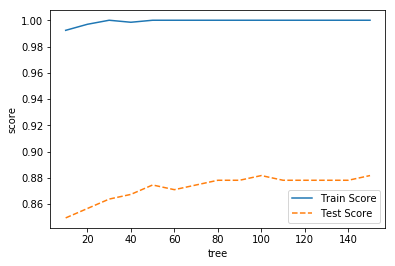

In [56]:
plt.plot(para_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_tree, test_score, linestyle='--', label = 'Test Score')
plt.xlabel('tree')
plt.ylabel('score')
plt.legend()

# train score가 1보다 적을 때(과적합을 피하기 위해서), 가장 높은 test score값을 보이는 tree = 20을 선택한다.

In [57]:
train_score = list()
test_score = list()

para_depth = [depth * 1 for depth in range(1, 11)]

for depth in para_depth:
    rf = RandomForestClassifier(random_state = 777, n_estimators=20, max_depth=depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

score_df = pd.DataFrame()
score_df['depth'] = para_depth
score_df['train'] = train_score
score_df['test'] = test_score

score_df.round(3)

,depth,train,test
0,1,0.810,0.799
1,2,0.810,0.799
2,3,0.833,0.806
3,4,0.857,0.817
4,5,0.896,0.835
5,6,0.925,0.846
6,7,0.934,0.857
7,8,0.954,0.860
8,9,0.962,0.857
9,10,0.968,0.867


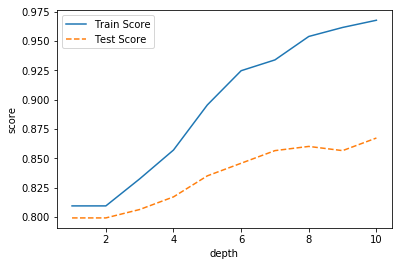

In [58]:
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend()

# max_depth가 깊어질수록 score는 증가하지만, 과적합을 줄이기위해서 임의의 값에서 max_depth를 정한다. max_depth == 6

In [59]:
train_score = list()
test_score = list()

para_split = [split * 2 for split in range(1, 21)]

for split in para_split:
    rf = RandomForestClassifier(random_state = 777, n_estimators=20, max_depth=6, min_samples_split=split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

score_df = pd.DataFrame()
score_df['split'] = para_split
score_df['train'] = train_score
score_df['test'] = test_score

score_df.round(3)

,split,train,test
0,2,0.925,0.846
1,4,0.919,0.842
2,6,0.919,0.857
3,8,0.905,0.857
4,10,0.897,0.846
5,12,0.902,0.842
6,14,0.892,0.849
7,16,0.896,0.835
8,18,0.892,0.842
9,20,0.891,0.846


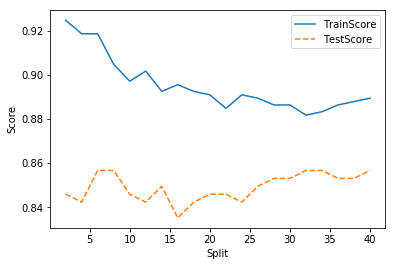

In [60]:
plt.plot(para_split, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_split, test_score, linestyle = '--', label = 'TestScore')
plt.xlabel('Split')
plt.ylabel('Score')
plt.legend()

# 가지치기가 가능한 최소 데이터 수를 설정하는 split이 증가함에 따라 스코어는 낮아진다. 그렇다고 Split을 무작정 낮게하면 과적합이 일어날 수 있으니 Test의 스코어는 증가하면서, Train의 스코어는 최고점과 가까운 split == 6으로 설정한다.

In [61]:
train_score = list()
test_score = list()

para_leaf = [leaf for leaf in range(1, 21)]

for leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 777, n_estimators=20, max_depth=6, min_samples_split= 6, min_samples_leaf=leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

score_df = pd.DataFrame()
score_df['leaf'] = para_leaf
score_df['train'] = train_score
score_df['test'] = test_score

score_df.round(3)

,leaf,train,test
0,1,0.919,0.857
1,2,0.914,0.846
2,3,0.903,0.846
3,4,0.911,0.839
4,5,0.891,0.849
5,6,0.885,0.835
6,7,0.879,0.824
7,8,0.885,0.832
8,9,0.883,0.824
9,10,0.873,0.832


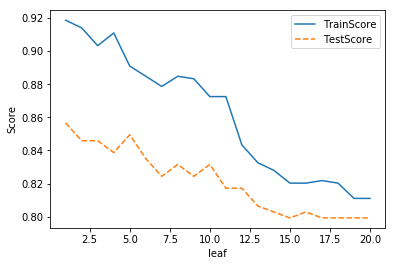

In [62]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'TestScore')
plt.xlabel('leaf')
plt.ylabel('Score')
plt.legend()

# 잎사귀 노드의 데이터 수를 결정하는 leaf가 많아짐에 따라 스코어는 낮아지는 경향을 보인다. 과적합을 줄이기 위해서는 leaf가 늘어나는 것이 좋겠지만, 하락세가 분명하고, 과적합을 막기위해 다른 파라미터들을 설정해줬으므로 leaf == 15로 임의로 설정한다.

In [63]:
rf_fin = RandomForestClassifier(random_state = 777, min_samples_leaf=15, min_samples_split=6, max_depth=6)
rf_fin.fit(df_train_x, df_train_y)
print(f'Final Model\'s Score on Training Data Set : {rf_fin.score(df_train_x, df_train_y)}')
print(f'Final Model\'s Score on Test Data Set : {rf_fin.score(df_test_x, df_test_y)}')

Final Model's Score on Training Data Set : 0.8233486943164362
Final Model's Score on Test Data Set : 0.8028673835125448


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
df_importance = pd.DataFrame()
df_importance['Feature'] = df_train_x.columns
df_importance['Importance'] = rf_fin.feature_importances_
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.203
2,DROPPED_CALLS,0.139
26,HANDSET_WC95,0.097
0,AGE,0.094
23,HANDSET_S80,0.086
1,SERVICE_DURATION,0.058
4,PEAK_CALLS_TIME,0.056
16,HANDSET_ASAD170,0.045
5,WEEKEND_CALLS_NO,0.037
3,PEAK_CALLS_NO,0.034


Text(0, 0.5, 'Importance')

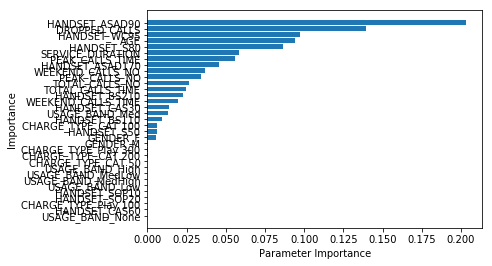

In [65]:
df_importance.sort_values('Importance', ascending= True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Parameter Importance')
plt.ylabel('Importance')

In [66]:
gb_uncustomized = GradientBoostingClassifier(random_state = 777)
gb_uncustomized.fit(df_train_x, df_train_y)

print(f'Score on training data set: {gb_uncustomized.score(df_train_x, df_train_y)}')
print(f'Score on test data set: {gb_uncustomized.score(df_test_x, df_test_y)}')

Score on training data set: 0.9754224270353302
Score on test data set: 0.8853046594982079


# train score와 test score의 차이를 보았을 때, uncustomized gb 모델은 과적합된 것으로 보인다. 따라서 파라미터를 세팅해준다.

In [67]:
train_accuracy = list()
test_accuracy = list()

para_lr = [lr * 0.1 for lr in range(1, 11)]

for lr in para_lr:
    gb = GradientBoostingClassifier(random_state=777, learning_rate=lr)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['lr'] = para_lr
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,lr,train,test
0,0.1,0.975,0.885
1,0.2,0.997,0.882
2,0.3,1.000,0.892
3,0.4,1.000,0.885
4,0.5,1.000,0.871
5,0.6,1.000,0.896
6,0.7,1.000,0.882
7,0.8,1.000,0.885
8,0.9,1.000,0.885
9,1.0,1.000,0.867


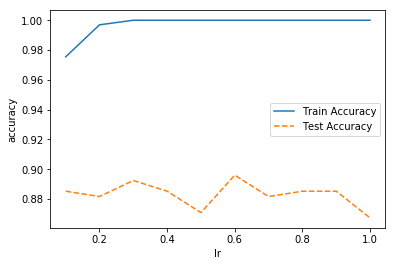

In [68]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('lr')
plt.ylabel('accuracy')
plt.legend()

# learning rate > 0.2일 때, train accuracy = 1이 되는 것을 알 수 있다. 이것은 과적합을 의미하므로 이 전의 값 중, test score가 가장 높게 나온 lr == 0.1을 사용한다.

In [69]:
train_accuracy = list()
test_accuracy = list()

para_tree = [tree * 10 for tree in range(1, 16)]

for tree in para_tree:
    gb = GradientBoostingClassifier(random_state=777, learning_rate=0.1, n_estimators= tree)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['tree'] = para_tree
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,tree,train,test
0,10,0.899,0.842
1,20,0.919,0.864
2,30,0.929,0.875
3,40,0.940,0.882
4,50,0.951,0.889
5,60,0.955,0.892
6,70,0.957,0.892
7,80,0.968,0.892
8,90,0.972,0.896
9,100,0.975,0.885


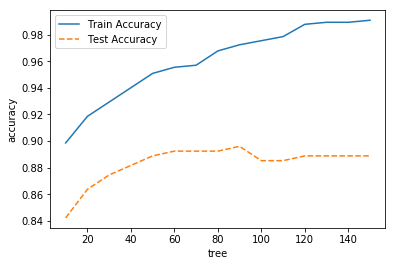

In [70]:
plt.plot(para_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_tree, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('tree')
plt.ylabel('accuracy')
plt.legend()

# n_estimator <= 90까지 test_accuracy가 증가하는 것을 알 수 있다. 이때, 90 >= n_estimator >= 60 에서 test accuracy에는 큰 차이가 없으므로 train accuracy와 test accuracy 사이의 갭도 최소가 되는 약 70을 사용한다.

In [71]:
train_accuracy = list()
test_accuracy = list()

para_leaf = [leaf for leaf in range(1, 30)]

for leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state=777, learning_rate=0.1, n_estimators= 70, min_samples_leaf=leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['leaf'] = para_leaf
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,leaf,train,test
0,1,0.957,0.892
1,2,0.966,0.896
2,3,0.966,0.892
3,4,0.957,0.900
4,5,0.963,0.896
5,6,0.959,0.896
6,7,0.957,0.896
7,8,0.952,0.892
8,9,0.952,0.896
9,10,0.954,0.900


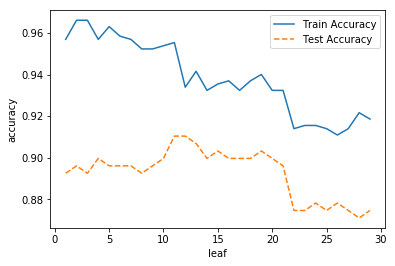

In [72]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('leaf')
plt.ylabel('accuracy')
plt.legend()

# leaf == 11에서 train accuracy는 높은 값을 유지하고 있으며, test accuracy 역시 최고점을 보인다. 마침 둘 사이의 갭도 작으므로 leaf == 1로 설정한다.

In [73]:
train_accuracy = list()
test_accuracy = list()

para_split = [split * 2 for split in range(1, 15)]

for split in para_split:
    gb = GradientBoostingClassifier(random_state=777, learning_rate=0.1, n_estimators= 70, min_samples_leaf=11, min_samples_split=split)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['split'] = para_split
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,split,train,test
0,2,0.955,0.910
1,4,0.955,0.910
2,6,0.955,0.910
3,8,0.955,0.910
4,10,0.955,0.910
5,12,0.955,0.910
6,14,0.955,0.910
7,16,0.955,0.910
8,18,0.955,0.910
9,20,0.955,0.910


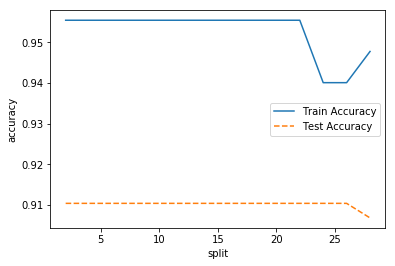

In [74]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('split')
plt.ylabel('accuracy')
plt.legend()

# split의 개수는 크게 영향을 끼치지 않는 것으로 보인다. 따라서 split == 20으로 임의로 설정한다.

In [75]:
train_accuracy = list()
test_accuracy = list()

para_depth = [depth for depth in range(1, 16)]

for depth in para_depth:
    gb = GradientBoostingClassifier(random_state=777, learning_rate=0.1, n_estimators= 70, min_samples_leaf=11, min_samples_split=20, max_depth=depth)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['depth'] = para_depth
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,depth,train,test
0,1,0.900,0.878
1,2,0.914,0.892
2,3,0.955,0.910
3,4,0.971,0.900
4,5,0.991,0.900
5,6,0.995,0.900
6,7,1.000,0.896
7,8,1.000,0.900
8,9,1.000,0.903
9,10,1.000,0.896


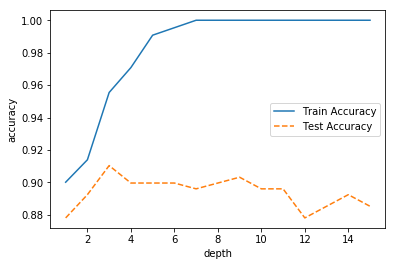

In [76]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()

# train값은 depth가 높아질수록 높은 정확성을 보이지만, test는 3이후 감소 증가를 반복한다. 또한 depth == 3에서 train과 test의 차이는 상대적으로 적다. 따라서 depth == 3

In [77]:
gb_fin = GradientBoostingClassifier(random_state = 777, learning_rate = 0.1, n_estimators=70, min_samples_leaf=11, min_samples_split=20, max_depth=3)
gb_fin.fit(df_train_x, df_train_y)
print(f'Final Model\'s Score on Training Data : {gb_fin.score(df_train_x, df_train_y)}')
print(f'Final Model\'s Score on Test Data : {gb_fin.score(df_test_x, df_test_y)}')

Final Model's Score on Training Data : 0.9554531490015361
Final Model's Score on Test Data : 0.910394265232975


In [78]:
df.tail()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
925,Churned,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,Churned,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,Churned,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,Churned,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3
929,Churned,F,30,Play 300,SOP10,Med,31.47,12,16,306.6,37,109.8,367,957.0


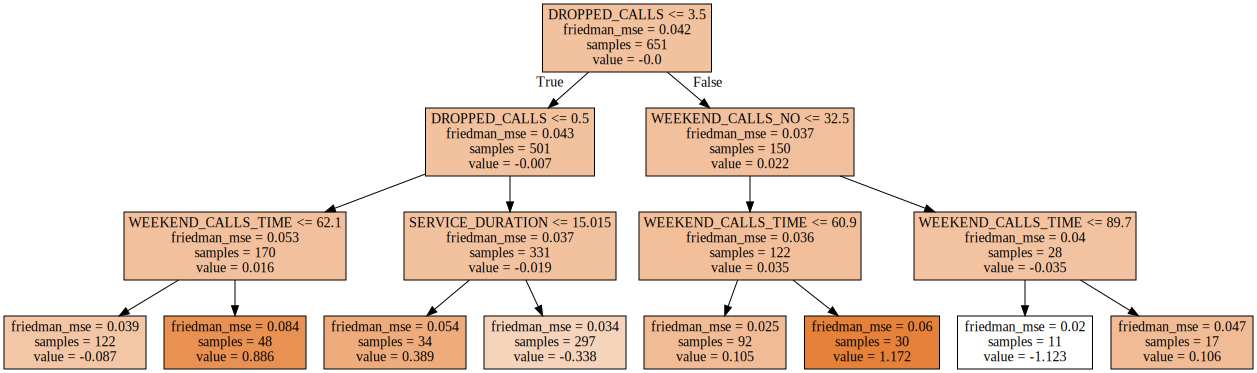

In [79]:
export_graphviz(gb_fin[-1][-1], out_file = 'gb_fin.dot', class_names = ['Active', 'Churned'], feature_names=df_train_x.columns, impurity = True, filled = True)
with open('gb_fin.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [82]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(df_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns = df_x.columns)
df_scaled_x.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424


In [84]:
df_scaled_train_x, df_scaled_test_x, df_scaled_train_y, df_scaled_test_y = train_test_split(df_scaled_x, df_y, test_size = 0.3, random_state = 777)

In [85]:
svc_uncustomized = SVC(random_state=777)
svc_uncustomized.fit(df_scaled_train_x, df_scaled_train_y)
print(f'Score on training data : {svc_uncustomized.score(df_scaled_train_x, df_scaled_train_y)}')
print(f'Score on test data : {svc_uncustomized.score(df_scaled_test_x, df_scaled_test_y)}')

Score on training data : 0.9124423963133641
Score on test data : 0.9068100358422939


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [101]:
train_accuracy = list()
test_accuracy = list()

para_c = [10 ** c for c in range(-2, 2)]

for c in para_c:
    svc = SVC(random_state=777, C=c)
    svc.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(svc.score(df_scaled_train_x, df_scaled_train_y))
    test_accuracy.append(svc.score(df_scaled_test_x, df_scaled_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['c'] = para_c
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,c,train,test
0,0.01,0.810,0.799
1,0.10,0.810,0.799
2,1.00,0.912,0.907
3,10.00,0.978,0.907


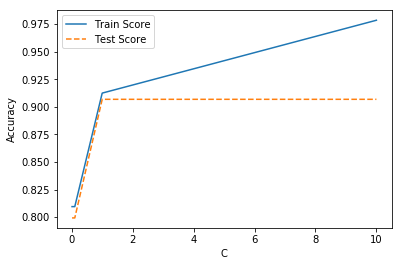

In [102]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Score')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()

# C = 1에서 변곡점이 생기므로, C = 1

In [107]:
train_accuracy = list()
test_accuracy = list()

para_gamma = [10 ** gamma for gamma in range(-2,2)]

for gamma in para_gamma:
    svc = SVC(random_state=777, gamma=gamma, C = 1)
    svc.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(svc.score(df_scaled_train_x, df_scaled_train_y))
    test_accuracy.append(svc.score(df_scaled_test_x, df_scaled_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['gamma'] = para_gamma
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,gamma,train,test
0,0.01,0.885,0.878
1,0.10,0.959,0.867
2,1.00,1.000,0.799
3,10.00,1.000,0.799


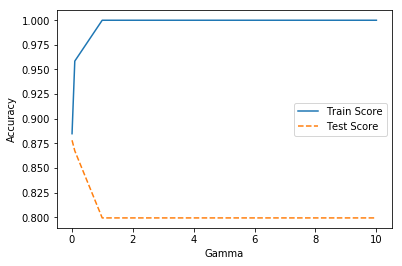

In [108]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Score')
plt.ylabel('Accuracy')
plt.xlabel('Gamma')
plt.legend()

# 0.01에서 과적합을 막는 편이 나을 것 같이 보이므로 gamma == 0.01

In [109]:
svc_fin = SVC(random_state=777, C = 1, gamma= 0.01)
svc_fin.fit(df_scaled_train_x, df_scaled_train_y)
print(f'Accuracy on training set: {svc_fin.score(df_scaled_train_x, df_scaled_train_y)}')
print(f'Accuracy on test set: {svc_fin.score(df_scaled_test_x, df_scaled_test_y)}')

Accuracy on training set: 0.8847926267281107
Accuracy on test set: 0.8781362007168458


In [110]:
y_pred = svc_fin.predict(df_scaled_test_x)
print(f'Confusion Matrix:\n{confusion_matrix(y_pred, df_scaled_test_y)}')

Confusion Matrix:
[[218  29]
 [  5  27]]


In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print(f'Accuracy on training data: {knn_uncustomized.score(df_train_x, df_train_y)}')
print(f'Accuracy on test data: {knn_uncustomized.score(df_test_x, df_test_y)}')

Accuracy on training data: 0.8172043010752689
Accuracy on test data: 0.8207885304659498


In [115]:
train_accuracy = list()
test_accuracy = list()

para_neighbor = [i for i in range(1, 21)]

for neighbor in para_neighbor:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['neighbor'] = para_neighbor
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy.round(3)

,neighbor,train,test
0,1,1.000,0.720
1,2,0.843,0.799
2,3,0.853,0.796
3,4,0.822,0.817
4,5,0.817,0.821
5,6,0.819,0.803
6,7,0.817,0.821
7,8,0.808,0.806
8,9,0.814,0.817
9,10,0.813,0.803


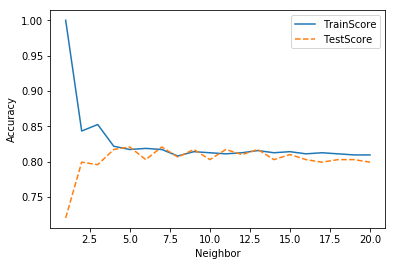

In [116]:
plt.plot(para_neighbor, train_accuracy, linestyle = '-', label = 'TrainScore')
plt.plot(para_neighbor, test_accuracy, linestyle = '--', label = 'TestScore')
plt.xlabel('Neighbor')
plt.ylabel('Accuracy')
plt.legend()

# neighbor == 4에서 train과 test의 차이가 가장 작아지며, test역시 상승세에 있으므로 neighbor를 4로 설정한다.

In [125]:
train_accuracy = list()
test_accuracy = list()

para_neighbor = [i for i in range(1, 21)] * 2
para_weight = ['uniform'] * 20 + ['distance'] * 20

for (weight, neighbor) in zip(para_weight, para_neighbor):
    knn = KNeighborsClassifier(n_neighbors = neighbor, weights = weight)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['weight'] = para_weight
df_accuracy['neighbor'] = para_neighbor
df_accuracy['train'] = train_accuracy
df_accuracy['test'] = test_accuracy
df_accuracy_pivot = df_accuracy.pivot(index = 'neighbor', columns = 'weight', values = ['train', 'test'])
df_accuracy_pivot.columns = df_accuracy_pivot.columns.get_level_values(0) + '_' + df_accuracy_pivot.columns.get_level_values(1)
df_accuracy_pivot

,train_distance,train_uniform,test_distance,test_uniform
neighbor,,,,
1,1.0,1.000000,0.720430,0.720430
2,1.0,0.843318,0.720430,0.799283
3,1.0,0.852535,0.799283,0.795699
4,1.0,0.821813,0.813620,0.817204
5,1.0,0.817204,0.817204,0.820789
6,1.0,0.818740,0.817204,0.802867
7,1.0,0.817204,0.813620,0.820789
8,1.0,0.807988,0.817204,0.806452
9,1.0,0.814132,0.824373,0.817204


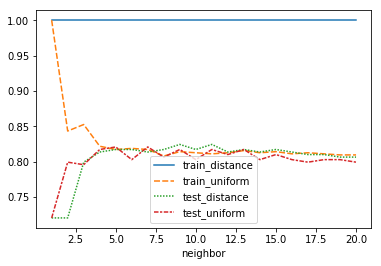

In [126]:
sns.lineplot(data = df_accuracy_pivot)